<b>Jacob J. Zhang</b><br>
<i>CISC 5420 Midterm Project</i><br>
Do Less Populated Regions Provide a Better Measure of Well-Being?

The question that is being posed is whether or not regions of the United States with lower population counts tend to correlate with a higher level of well-being. In my travel experience, places with lower populations tend to leave me with a better impression-- but there are multiple factors that could be wrong with this anecdotal reference. It could be due to my introverted nature, due to the fact that I was traveling versus residing in those areas, etc.

I decided to find out if this was true through data analysis. To measure well-being, we will use a microcosmic version of the Human Development Index, a metric comprised of access of healthcare, educational attainment level, and income, which strives to measure the well-being of nations. Our data sets come from the last U.S. census, and to exclude cultural and ethnic factors, we will focus entirely on the United States.

The first step is to take a look at our population data and determine what constitutes a large population versus a small one. We'll build a histogram to see the distribution:


Index(['Id', 'Id2', 'Geography', 'Target Geo Id', 'Target Geo Id2', 'Country',
       'Geographic region', 'April 1, 2010 - Census',
       'April 1, 2010 - Estimates Base',
       'Population Estimate (as of July 1) - 2010',
       'Population Estimate (as of July 1) - 2011',
       'Population Estimate (as of July 1) - 2012',
       'Population Estimate (as of July 1) - 2013',
       'Population Estimate (as of July 1) - 2014',
       'Population Estimate (as of July 1) - 2015'],
      dtype='object')
Axes(0.125,0.125;0.775x0.775)


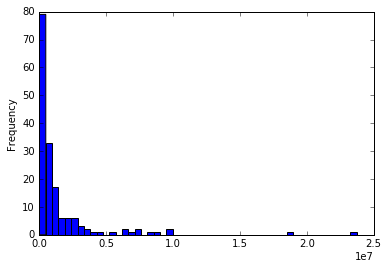

In [180]:
populations = pandas.read_csv('datasets/population_values.csv', sep=',', index_col=False, encoding='latin-1', skiprows=1, skipfooter=4, engine='python')
print(populations.columns)
pop_index = populations.set_index('Geographic region', drop=False)
latest_pop = pop_index[pop_index['Geographic region'] != 'United States']['Population Estimate (as of July 1) - 2015']
print(latest_pop.plot(kind='hist', bins=50, normed=False))

The above histogram tells us that at around 500,000 people, the number of U.S. regions dramatically tapers off. At initial glance, this looks like a Pareto distribution, as the tail clearly extends on the right. There is quite a spread. To ensure we have enough large cities, we can settle on anything under 500,000 residents as being labeled a "small region" and those above being labeled as a "large region".

We can now examine the first third of our well-being equation, namely education:

In [181]:
%matplotlib inline

import numpy
import pandas

frame = pandas.read_csv('datasets/educational_est_values.csv', sep=',', encoding='latin-1', skiprows=1)
print("List of columns\n")
print(frame.columns)
edu_by_geo = frame.set_index('Geographic area name', drop=False)
print("\nType of Educational Services and Totals\n")
print(edu_by_geo['Meaning of 2012 NAICS code'].value_counts())


List of columns

Index(['Geographic identifier code', 'Id2', 'Geographic area name',
       '2012 NAICS code', 'Meaning of 2012 NAICS code',
       'Type of operation or tax status code',
       'Meaning of Type of operation or tax status code', 'Year',
       'Number of establishments', 'Receipts/Revenue ($1,000)',
       'Operating expenses ($1,000)', 'Annual payroll ($1,000)',
       'First-quarter payroll ($1,000)',
       'Number of paid employees for pay period including March 12',
       'Percent of receipts/revenue from administrative records (%)',
       'Percent of receipts/revenue estimated (%)'],
      dtype='object')

Type of Educational Services and Totals

Educational support services                               1269
Educational services                                        990
Sports and recreation instruction                           922
Fine arts schools                                           916
Technical and trade schools                                 908


It is also important to know how many regions we will be analyzing. To keep the sample size small, we will only count unique regions, which tally up to 166. Knowing that, we can also generalize and look at all educational establishments per region, as the separation between the establishment types is not crucial for our analysis. 

To get a better intuition for this particular series, the maximum and minimum values will also be counted. Sorting all educational establishments reveal that the NY-NJ-CT-PA region has the most educational establishments, while Martin-Union City has the least. This is expected, as larger populations would correlate with more schools, training facilities, vocational centers, etc.

At this point, plotting out the distribution of the number of educational establishments should us see where the distribution for most regions lay. Aside from a few outliers, all seem to be under 5,000 establishments.

Total Regions : 166
Maximum : New York-Newark, NY-NJ-CT-PA CSA 38887
Minimum : Martin-Union City, TN-KY CSA 21
Axes(0.125,0.125;0.775x0.775)


/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


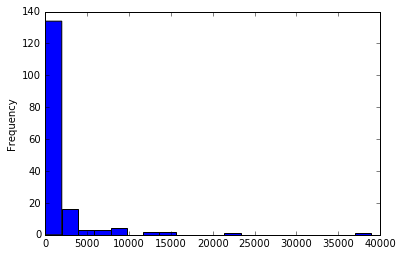

In [182]:
print('Total Regions :', len(edu_by_geo['Geographic area name'].unique()))
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)
print('Maximum :', flattened_all_edu_est['Number of establishments'].idxmax(), flattened_all_edu_est['Number of establishments'].max())
print('Minimum :', flattened_all_edu_est['Number of establishments'].idxmin(), flattened_all_edu_est['Number of establishments'].min())
print(flattened_all_edu_est['Number of establishments'].plot(kind='hist', bins=20))

The above histogram doesn't provide any new insights. At this step, the population can now be concatenated with the previous table dictating the number of establishments. We expect a high correlation between the number of establishments in a region and its population estimate, and we find this to be true when calculated.

Because using raw establishment counts and population estimates will provide sufficient insight, it is important to then calculate the number of residents per educational establishments. This gives a sense of how many people each school or training facility can service-- a far better metric to use when determining well-being.
We can do this by calculating residents per establishment, a variable which tells us how many students each center can cater to.

In [183]:
edu_and_pop = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1).sort('Population Estimate (as of July 1) - 2015')
print(edu_and_pop.corr())

edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
edu_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
full_edu_table = edu_table[['Residents per Edu. Est.', 'Population Estimate (as of July 1) - 2015']].sort('Residents per Edu. Est.')
pandas.set_option('max_colwidth',20)
full_edu_table

                      Number of establishments  \
Number of establi...             1.000000        
Population Estima...             0.981838        

                      Population Estimate (as of July 1) - 2015  
Number of establi...             0.981838                        
Population Estima...             1.000000                        


/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Residents per Edu. Est.,Population Estimate (as of July 1) - 2015
"Edwards-Glenwood Springs, CO CSA",387.685629,129487.0
"Steamboat Springs-Craig, CO CSA",416.483146,37067.0
"Denver-Aurora, CO CSA",512.267905,3418876.0
"Seattle-Tacoma, WA CSA",570.687043,4602591.0
"San Jose-San Francisco-Oakland, CA CSA",608.173786,8713914.0
"New York-Newark, NY-NJ-CT-PA CSA",610.067529,23723696.0
"Boston-Worcester-Providence, MA-RI-NH-CT CSA",616.078969,8152573.0
"Bend-Redmond-Prineville, OR CSA",649.828383,196898.0
"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA",651.859678,9625360.0
"Springfield-Greenfield Town, MA CSA",654.783784,702583.0


We can now plot this new variable and see if there are distinguishing characteristics between smaller and large populations. It seems that the majority of the establishments service around 1,000 people, tough some are servicing nearly 5,000. In terms of well-being, we can argue that the lower number of people that an establishment has to cater to, the better. This is due to more individual attention and better ease of organization.

By plotting the CDF, we can see that at the 50th percentile, large regions (in blue) tend to cater to around 1,000 residents per institution, whereas smaller regions need to cater to nearly 1,400. This is the first instance where one aspect of our well-being equation favors areas with higher population.

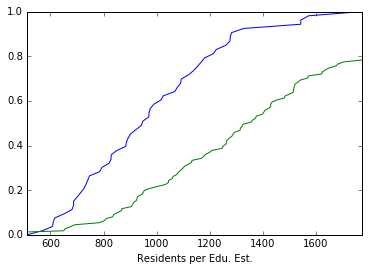

In [184]:
large_regions = full_edu_table[full_edu_table['Population Estimate (as of July 1) - 2015'] > 1000000]
small_regions = full_edu_table[full_edu_table['Population Estimate (as of July 1) - 2015'] < 1000000]

ser1 = large_regions['Residents per Edu. Est.']
cum_dist = numpy.linspace(0.,1., len(ser1))
ser_cdf = pandas.Series(cum_dist, index=ser1)
edu_plot = ser_cdf.plot(drawstyle='line', label="Large Cities")

ser2 = small_regions['Residents per Edu. Est.']
cum_dist = numpy.linspace(0.,1., len(ser2))
ser_cdf2 = pandas.Series(cum_dist, index=ser2)
edu_plot.plot(ser_cdf2, label="Small Cities")

Distribution Modeling

/Users/user/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


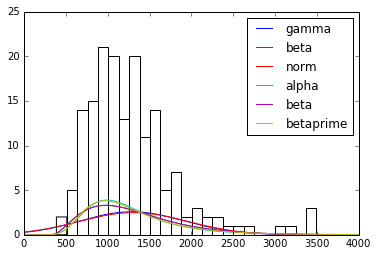

In [185]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 4000
x = scipy.arange(size)
y = full_edu_table['Residents per Edu. Est.'].astype(float).dropna().as_matrix()
h = plt.hist(y, bins=40, color='w')

dist_names = ['gamma', 'beta', 'norm', 'alpha', 'beta', 'betaprime']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    # pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,4000)
plt.legend(loc='upper right')
plt.show()

# try normal and change bins
# distribution sums to one

Though access to educational institutions is great, even more important is how many educational staffers there are. We can calculate this by calculating the number of educational employees per resident, a variable which tells us how many educational employees such as teachers and coaches are available per resident. In this case, the higher the better.

A quick analysis shows that as the population grows, there does seem to be a trend towards more teachers, coaches, trainers, etc.

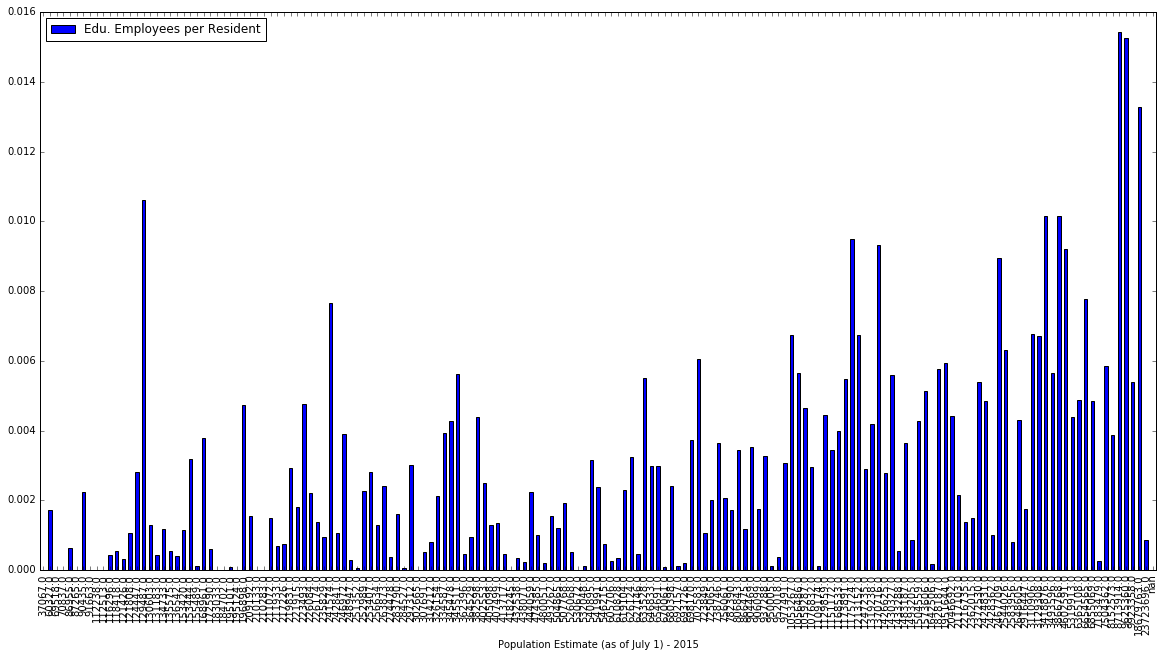

In [186]:
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']
edu_receipt_employee = all_edu_est.groupby('Geographic area name').sum().sort_values(by='Receipts/Revenue ($1,000)', ascending=False)
ere = edu_receipt_employee[['Receipts/Revenue ($1,000)', 'Number of paid employees for pay period including March 12']]
ere_pop = pandas.concat([ere, latest_pop], axis=1)
ere_pop['Edu. Employees per Resident'] = ere_pop['Number of paid employees for pay period including March 12'] / ere_pop['Population Estimate (as of July 1) - 2015']
educators = ere_pop[['Edu. Employees per Resident', 'Population Estimate (as of July 1) - 2015']].sort_values(by='Population Estimate (as of July 1) - 2015')

educators.plot(kind='bar', y='Edu. Employees per Resident', x='Population Estimate (as of July 1) - 2015', figsize=(20, 10))

We can now incorporate the number of healthcare institutions. It would be interesting to find the number of healthcare establishments compared to the number of educational establishments. As expected there is a tight correlation, largely because both numbers derive from population.

In [187]:
health_est = pandas.read_csv('datasets/health_est_values.csv', sep=',', encoding='latin-1', skiprows=1)
health_est = health_est.set_index('Geographic area name', drop=False)
health_est_all = health_est[health_est['Meaning of Type of operation or tax status code'] == 'All establishments']
flattened_all_health_est = health_est_all.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort_values(by='Number of establishments', ascending=False)
health_edu_est = pandas.concat([flattened_all_health_est['Number of establishments'], flattened_all_edu_est['Number of establishments']], axis=1)
health_edu_est.columns = ['Health Establishments', 'Educational Establishments']

print(health_edu_est.corr())

                      Health Establishments  Educational Establishments
Health Establishm...             1.000000               0.987437       
Educational Estab...             0.987437               1.000000       


Let's investigate what the differences are in the number of educational establishments when accounting for population.

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


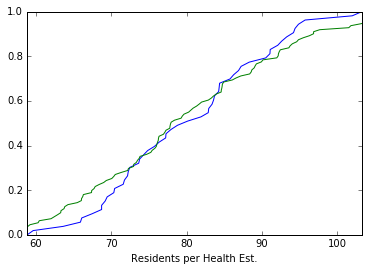

In [212]:
health_pop_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
health_pop_table['Residents per Health Est.'] = health_pop_table['Population Estimate (as of July 1) - 2015'] / health_pop_table['Number of establishments']
health_pop_table = health_pop_table.sort('Residents per Health Est.')

hlarge_regions = health_pop_table[health_pop_table['Population Estimate (as of July 1) - 2015'] > 1000000]
hsmall_regions = health_pop_table[health_pop_table['Population Estimate (as of July 1) - 2015'] < 1000000]

hser1 = hlarge_regions['Residents per Health Est.']
hcum_dist = numpy.linspace(0.,1., len(hser1))
hser_cdf = pandas.Series(hcum_dist, index=hser1)
hlarge_plot = hser_cdf.plot(drawstyle='line', label="Large Regions")

hser2 = hsmall_regions['Residents per Health Est.']
hcum_dist = numpy.linspace(0.,1., len(hser2))
hser_cdf2 = pandas.Series(hcum_dist, index=hser2)
hlarge_plot.plot(hser_cdf2, label="Small Regions")

We can see that at the lower percentiles, the smaller regions line is closer to the y-axis. This means in terms of residents per healthcare establishment, smaller regions win because there is more availability for healthcare. However, once the "residents per healthcare establishment" variable hits a certain point, large regions are able to provide at a slightly higher rate than smaller ones.

(27.434247056346699, 11.838848064662521, 2.4761640465524448)
(24.668178415810676, 574797.25549294217, 15.142631398638082, 1506080.2545884023)
(79.770543955564577, 13.012694326312907)
(1.8679704036190103, -0.10790103370296904, 46.153863740883899)


/Users/user/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


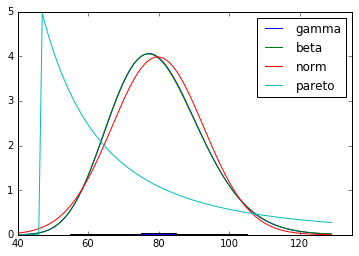

In [189]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 130
x = scipy.arange(size)
y = health_pop_table['Residents per Health Est.'].astype(float).dropna().as_matrix()
h = plt.hist(y, bins=numpy.arange(40, 140, 5), color='b', normed=True)

dist_names = ['gamma', 'beta', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    print(param)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(40,135)
plt.legend(loc='upper right')
plt.show()

# add titles/labels

What's interesting to note is that the "residents per healthcare institution" figures have a more even distribution. This could be explained by many reasons-- one of which is that society places a higher priority on healthcare than on education. Another possibility could be that healthcare is more meritocratic than education.

We can now examine another crucial variable, and that is one of health cost per resident. We can obtain this by dividing the total revenues of the healthcare establishments in a region and dividing by population.

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


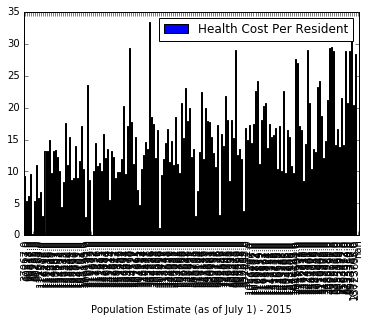

In [190]:
flattened_all_health_est = health_est_all.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)
health_receipt_employee = health_est_all.groupby('Geographic area name').sum().sort('Number of paid employees for pay period including March 12', ascending=False)
hre = health_receipt_employee[['Receipts/Revenue ($1,000)', 'Number of paid employees for pay period including March 12']]
hrep = pandas.concat([hre, latest_pop], axis=1)
hrep['Health Cost Per Resident'] = hrep['Receipts/Revenue ($1,000)'] / hrep['Population Estimate (as of July 1) - 2015']
hrep_pop = hrep[['Health Cost Per Resident', 'Population Estimate (as of July 1) - 2015']].sort('Population Estimate (as of July 1) - 2015', ascending=True)
hrep_pop.plot(kind='bar', x='Population Estimate (as of July 1) - 2015', y='Health Cost Per Resident', legend=True)

We'll now want to incorporate incomes and wealth into this equation. A column called "Payroll per employee" was calculated by dividing the "Annual payroll" of a region with its "number of paid employees". While not wholly accurate, we care more about the relativitiy of the incomes than on precision. We can then integrate this in with the rest of our data. 

In [213]:
business = pandas.read_csv('datasets/business_est_values.csv', sep=',', encoding='latin-1', skiprows=13, skipfooter=24) 
business_totals = business[business['Meaning of 2012 NAICS code'] == 'Total for all sectors']
business_grouped = business_totals[['Geographic area name', 'Payroll Per Employee']].groupby('Geographic area name').sum()
pandas.concat([health_edu_est, business_grouped['Payroll Per Employee'], latest_pop], axis=1).sort('Payroll Per Employee')

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Health Establishments,Educational Establishments,Payroll Per Employee,Population Estimate (as of July 1) - 2015
"Brownsville-Harlingen-Raymondville, TX CSA",5245.0,184.0,26,444059.0
"McAllen-Edinburg, TX CSA",10934.0,386.0,26,906099.0
"Clovis-Portales, NM CSA",756.0,22.0,27,69518.0
"Hot Springs-Malvern, AR CSA",1852.0,87.0,28,130603.0
"Martin-Union City, TN-KY CSA",917.0,21.0,28,70837.0
"Manhattan-Junction City, KS CSA",1420.0,126.0,28,135575.0
"Myrtle Beach-Conway, SC-NC CSA",5527.0,383.0,29,493262.0
"El Paso-Las Cruces, TX-NM CSA",10200.0,670.0,29,1053267.0
"Lubbock-Levelland, TX CSA",4586.0,316.0,3,334587.0
"Fayetteville-Lumberton-Laurinburg, NC CSA",6265.0,348.0,30,546215.0


In [218]:
full_table = pandas.concat([health_edu_est, business_grouped['Payroll Per Employee']], axis=1).sort('Payroll Per Employee').dropna()
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
health_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Health Est.'] = health_table['Population Estimate (as of July 1) - 2015'] / health_table['Number of establishments']
full_table.astype(float).corr()

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Health Establishments,Educational Establishments,Payroll Per Employee,Residents per Edu. Est.,Residents per Health Est.
Health Establishments,1.000000,0.987437,0.591284,-0.296601,-0.157164
Educational Establishments,0.987437,1.000000,0.605825,-0.306590,-0.144445
Payroll Per Employee,0.591284,0.605825,1.000000,-0.358772,-0.074673
Residents per Edu. Est.,-0.296601,-0.306590,-0.358772,1.000000,0.414564
Residents per Health Est.,-0.157164,-0.144445,-0.074673,0.414564,1.000000


Surprisingly, payroll correlates the least with population. This could be due to fiercier and greater competition, a wider range of employment, and many other reasons. With that said, there is still a positive correlation with the other variables, leading us to our next analysis.

The most important step now will be deriving our microcosmic HDI. To do this, we will take the two relative figures (residents per educational establishment and residents per healthcare establishment) and compare them to the max and mins of their series to achieve a relative score. We will then do the same with payroll to see which regions provide the highest level of well-being.

In [215]:
from scipy import stats
from scipy.stats.mstats import gmean

full_table['Residents Per Edu Percentile'] = 1 - stats.rankdata(full_table['Residents per Edu. Est.'], "average")/len(full_table['Residents per Edu. Est.'])
full_table['Residents Per Health Percentile'] = 1 - stats.rankdata(full_table['Residents per Health Est.'], "average")/len(full_table['Residents per Health Est.'])
full_table['Payroll Percentile'] = (stats.rankdata(full_table['Payroll Per Employee'], "average")/len(full_table['Payroll Per Employee']))
# need composite static/metric to integrate all 3
res = full_table['Residents Per Edu Percentile'] * full_table['Residents Per Health Percentile'] * full_table['Payroll Percentile'] 
full_table['HDI Percentile'] = res**(1. / 3.)
clean_full_table = full_table[['Residents Per Edu Percentile', 'Residents Per Health Percentile', 'Payroll Percentile', 'HDI Percentile']]
clean_full_table.sort('HDI Percentile')


/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Residents Per Edu Percentile,Residents Per Health Percentile,Payroll Percentile,HDI Percentile
Geographic area name,,,,
"Pueblo-CaÐon City, CO CSA",0.000000,0.000000,0.231928,0.000000
"Moses Lake-Othello, WA CSA",0.006024,0.006024,0.518072,0.026590
"DeRidder-Fort Polk South, LA CSA",0.114458,0.012048,0.072289,0.046367
"Clovis-Portales, NM CSA",0.030120,0.192771,0.018072,0.047167
"Visalia-Porterville-Hanford, CA CSA",0.042169,0.018072,0.153614,0.048919
"Brownsville-Harlingen-Raymondville, TX CSA",0.054217,0.331325,0.009036,0.054549
"McAllen-Edinburg, TX CSA",0.066265,0.409639,0.009036,0.062597
"El Paso-Las Cruces, TX-NM CSA",0.198795,0.036145,0.045181,0.068728
"Dixon-Sterling, IL CSA",0.018072,0.060241,0.307229,0.069415


When accounting for access to healthcare, education availability, and average income, the larger cities do seem to come out ahead. Some of the nation's most populated regions, included the tri-state area and the bay area, rank the highest when everything is accounted for. However, to confirm this, let's analyze the distribution of HDI and try to see if there is a substantial difference when accounting for population.

Index(['HDI Percentile', 'Population Estimate (as of July 1) - 2015'], dtype='object')
Index(['HDI Percentile', 'Population Estimate (as of July 1) - 2015'], dtype='object')


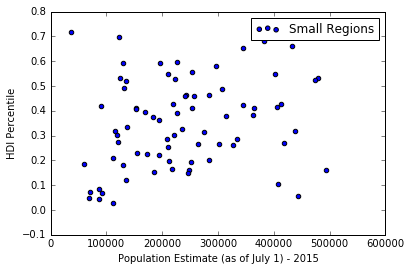

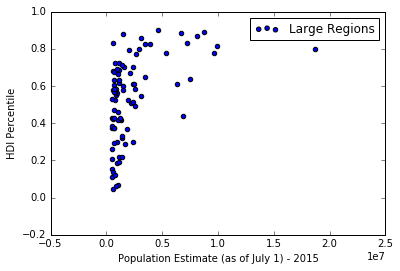

In [217]:
HDIpct = clean_full_table['HDI Percentile']
hdi_pop = pandas.concat([HDIpct, latest_pop], axis=1)

hp_small_regions = hdi_pop[hdi_pop['Population Estimate (as of July 1) - 2015'] < 500000]
hp_large_regions = hdi_pop[hdi_pop['Population Estimate (as of July 1) - 2015'] > 500000]

small_plot = hp_small_regions.plot(kind='scatter', y='HDI Percentile', x='Population Estimate (as of July 1) - 2015', legend=True, label="Small Regions")
large_plot = hp_large_regions.plot(kind='scatter', y='HDI Percentile', x='Population Estimate (as of July 1) - 2015', legend=True, label="Large Regions")

print(hdi_pop.columns)
print(hp_large_regions.columns)

If population is above a million, more likely to have a high HDI.

These plots show what we've seen all along-- when looking at the higher HDI percentiles, larger regions are much more likely to end up there. This is due to the variables we have analyzed-- higher wages, more availability to healthcare and medical professionals, and more access to education.

With that said, the original question can answered with a resounding "no". Smaller regions have lost on every front with the exception of healthcare, which we have hypothesized could be deemed the most necessary of all the variables we've observed.